In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import nltk  # imports the natural language toolkit

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hrutik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hrutik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
def scrapper(url):
    jobs_list = []
    resp = requests.get(url)
    soup = BeautifulSoup(resp.content, 'html.parser')
    jobs = soup.find_all('div',
                         class_='base-card relative w-full hover:no-underline focus:no-underline base-card--link base-search-card base-search-card--link job-search-card')
    for job in jobs:
        job_link = job.find('a', class_='base-card__full-link')['href']
        resp = requests.get(job_link)
        soup = BeautifulSoup(resp.content, 'html.parser')
        try:
            data = {
                "job_title": soup.find('h1', class_='topcard__title').get_text().strip(),
                "company": soup.find('a',
                                     class_='topcard__org-name-link topcard__flavor--black-link').get_text().strip(),
                "location": soup.find('span', class_='topcard__flavor topcard__flavor--bullet').get_text().strip(),
                "job_desc": soup.find('div', class_='description__text description__text--rich').get_text().strip(),
                "job_link": job_link
            }
        except AttributeError:
            continue
        jobs_list.append(data)
    return jobs_list

In [14]:
jobs_list = []
for i in range(0, 100, 25):
    url = f'https://www.linkedin.com/jobs/search?keywords=Data%20Scientist&location=Toronto%2C%20Ontario%2C%20Canada&geoId=100025096&trk=public_jobs_jobs-search-bar_search-submit&position=1&pageNum={i}'
    jobs_list.extend(scrapper(url))
df = pd.DataFrame(jobs_list)
df

,job_title,company,location,job_desc,job_link
0,Machine Learning Engineer,Cash App,"Toronto, Ontario, Canada",Company DescriptionIt all started with an idea...,https://ca.linkedin.com/jobs/view/machine-lear...
1,"Data Scientist, Consultant",Project X Ltd.,"Toronto, Ontario, Canada",About Project XProject X Ltd. drives success b...,https://ca.linkedin.com/jobs/view/data-scienti...
2,Senior Data Scientist,Borrowell,"Toronto, Ontario, Canada",About Borrowell:Borrowell is a Canadian compan...,https://ca.linkedin.com/jobs/view/senior-data-...
3,Lead Data Scientist,Experfy,"Toronto, Ontario, Canada",Opportunity DescriptionWe are seeking a Princi...,https://ca.linkedin.com/jobs/view/lead-data-sc...
4,Data Scientist,Grammarly,"Toronto, Ontario, Canada",Grammarly is excited to offer a remote-first h...,https://ca.linkedin.com/jobs/view/data-scienti...
5,Associate Data Scientist,Validere,"Toronto, Ontario, Canada","Who we are:Validere is a measurement, reportin...",https://ca.linkedin.com/jobs/view/associate-da...
6,Junior Data Scientist,OMERS,"Toronto, Ontario, Canada",Are you looking to join a dynamic pension plan...,https://ca.linkedin.com/jobs/view/junior-data-...
7,"Data Scientist, Risk",Square,"Toronto, Ontario, Canada",Company DescriptionSince we opened our doors i...,https://ca.linkedin.com/jobs/view/data-scienti...
8,Machine Learning Engineer (Canada),Tiger Analytics,"Toronto, Ontario, Canada",DescriptionTiger Analytics is an advanced anal...,https://ca.linkedin.com/jobs/view/machine-lear...
9,Machine Learning Engineer (Canada),Tiger Analytics,"Toronto, Ontario, Canada",DescriptionTiger Analytics is an advanced anal...,https://ca.linkedin.com/jobs/view/machine-lear...


In [15]:
job_desc = df['job_desc'].tolist()
job_desc

["Company DescriptionIt all started with an idea at Block in 2013. Initially built to take the pain out of peer-to-peer payments, Cash App has gone from a simple product with a single purpose to a dynamic app, bringing a better way to send, spend, invest, borrow and save to our millions of monthly active users. With a mission to redefine the world's relationship with money by making it more relatable, available and accessible, at Cash App you'll have the opportunity to make a real-world impact with your career.Today, Cash App has thousands of employees around the world with a culture geared toward creativity, collaboration and impact. We’ve been a distributed team since day one, and continue to value working across time zones and continents both remotely and in our Cash App offices.Our offices are great, but many of our roles can be done remotely from the countries where Block operates. We tailor our experience to champion our employees’ creativity and productivity wherever they are.Jo

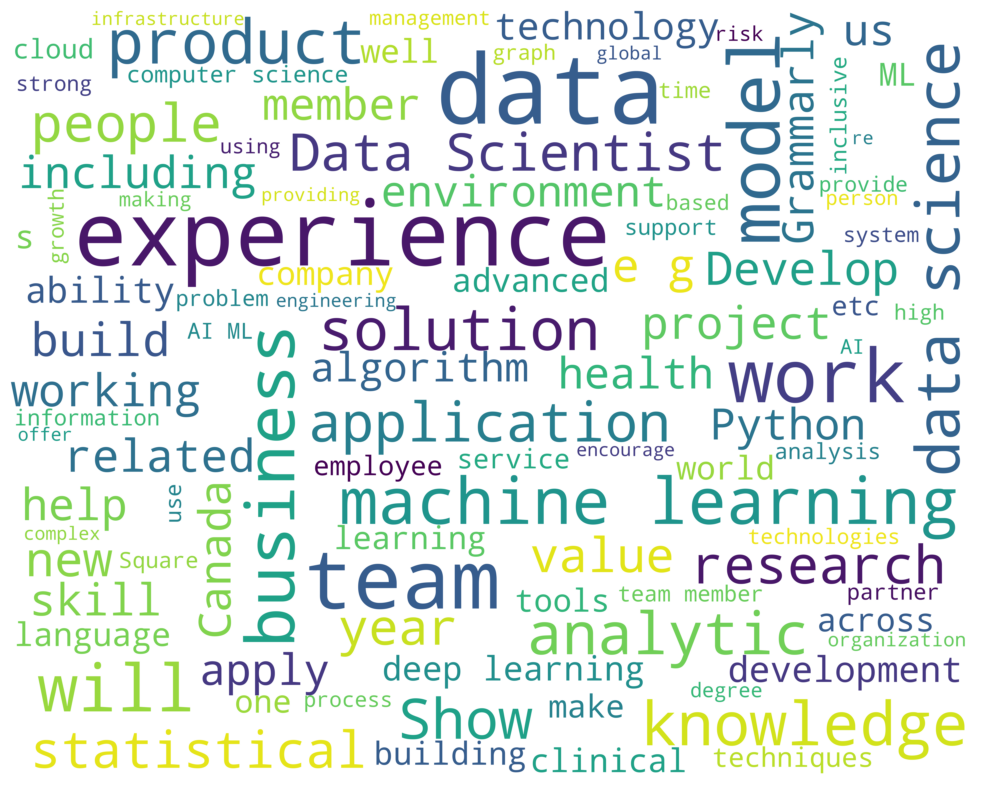

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

word_cloud_text = ''.join(job_desc)
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white",
                      scale=10, width=1000, height=800).generate(word_cloud_text)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()